<a href="https://colab.research.google.com/github/MohitPunasiya/EE_769-Introduction-to-ML/blob/main/A3_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv")

In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


#Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d977678d0>,
      dtype=object)

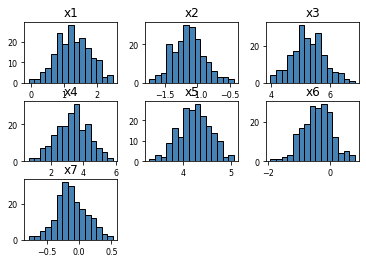

In [ ]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False) #https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/

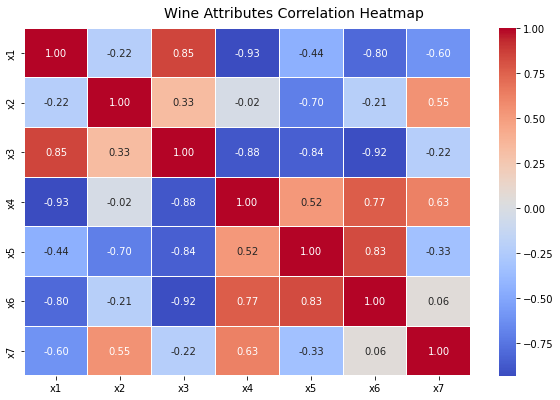

In [ ]:
# Correlation Matrix Heatmap
fig, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
fig.subplots_adjust(top=0.93)
t = fig.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)  
#https://machinelearningmastery.com/data-visualization-in-python-with-matplotlib-seaborn-and-bokeh/

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


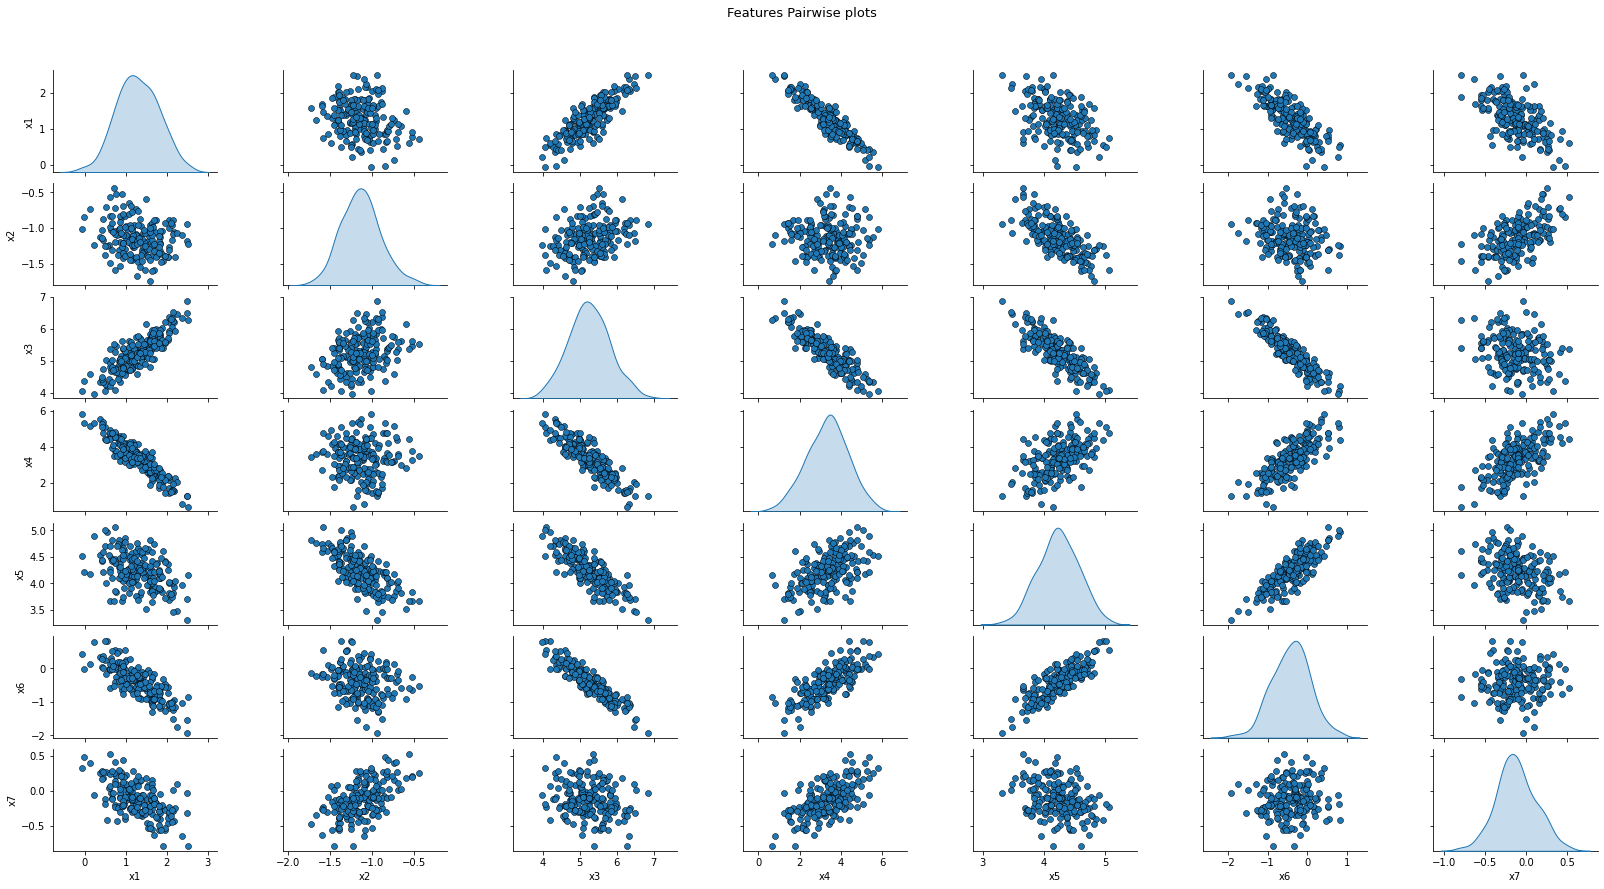

In [ ]:
# Pair-wise Scatter Plots
cols = list(df.columns)
pairplot = sns.pairplot(df[cols], size=1.8, aspect=1.8,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))
fig = pairplot.fig 
fig.subplots_adjust(top=0.91, wspace=0.4)
t = fig.suptitle('Features Pairwise plots', fontsize=13)
#https://machinelearningmastery.com/data-visualization-in-python-with-matplotlib-seaborn-and-bokeh/

#PCA and explained variance

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(df)
transformed_df = pca.transform(df)
explained_var = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_var)

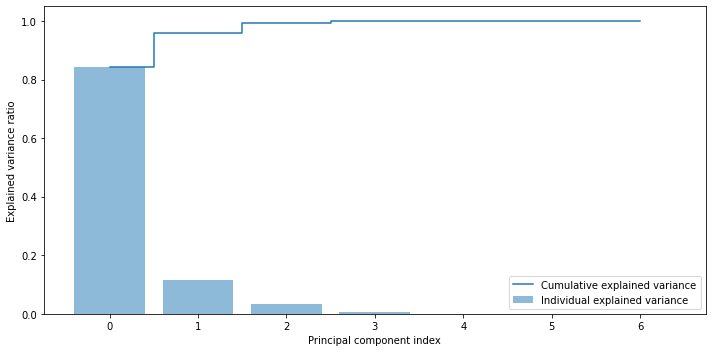

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(0,len(explained_var)),explained_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumsum)), cumsum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#https://vitalflux.com/pca-explained-variance-concept-python-example/

Text(0.5, 0, 'Principal component index')

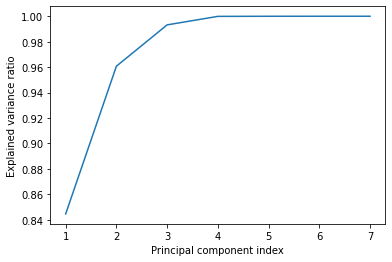

In [ ]:
plt.plot(range(1,len(cumsum)+1),cumsum) #continous plot in between data points
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
##https://vitalflux.com/pca-explained-variance-concept-python-example/


*   It can be observed from cumulative variance explained that with two principal components more than 95% of variance of data can be captured

#Reconstruction of data 

In [ ]:
from sklearn.decomposition import PCA
MSE_list = []
for i in range(1,8,1):
    pca = PCA(n_components=i)
    pca.fit(df)
    data_reduced = pca.transform(df)   #after transformation  > lower dimension
    data_original = np.dot(data_reduced, pca.components_) + pca.mean_ #reconstruction of data using principal components
    MSE = (1/df.shape[0])*((data_original-df.values)**2).sum()
    MSE_list.append(MSE)

Text(0.5, 1.0, "PC's vs MSE")

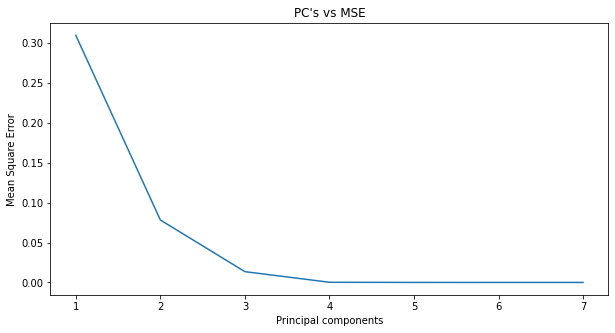

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(MSE_list)+1),MSE_list)
plt.xlabel('Principal components')
plt.ylabel('Mean Square Error')
plt.title("PC's vs MSE")

#summary
-It can be observed from cumulative variance explained that with two principal components more than 95% of variance of data can be captured
-We can also notice that as no of principal components increase the mean squre error decreases, which shows that loss of information decreases as we include more and more PC
